In [4]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"


In [5]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data_to_load = pd.read_csv("Data/mouse_drug_data.csv")
clinical_trial_data_to_load = pd.read_csv("Data/clinicaltrial_data.csv")

In [6]:
mouse_drug_data_to_load.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [7]:
clinical_trial_data_to_load.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [8]:
# Combine the data into a single dataset
drug_trial_data = clinical_trial_data_to_load.merge(mouse_drug_data_to_load, on = 'Mouse ID', how = 'outer')
drug_trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [9]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [10]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_response_df = drug_trial_data[['Drug', 'Timepoint', 'Tumor Volume (mm3)']]
tumor_response_df = pd.DataFrame(tumor_response_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean())

In [11]:
# Convert to DataFrame

tumor_response_df["Volume SEM"] = tumor_response_df['Tumor Volume (mm3)'].sem()
tumor_response_df.reset_index(inplace = True)
tumor_response_df.head()


,Drug,Timepoint,Tumor Volume (mm3),Volume SEM
0,Capomulin,0,45.000000,0.898067
1,Capomulin,5,44.266086,0.898067
2,Capomulin,10,43.084291,0.898067
3,Capomulin,15,42.064317,0.898067
4,Capomulin,20,40.716325,0.898067


In [12]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_response_pivot = tumor_response_df.pivot_table(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')  
tumor_response_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [13]:
# Store the Standard Error of Tumor Response rouped by Drug and Timepoint
tumor_response_sem_pivot = tumor_response_df.pivot_table(index='Timepoint',columns='Drug',values='Volume SEM')  
tumor_response_sem_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
5,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
10,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
15,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
20,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
25,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
30,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
35,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
40,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067


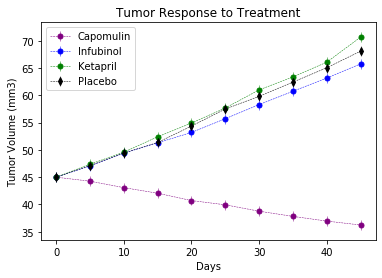

In [14]:
tumfig = plt.figure()

plt.errorbar(tumor_response_pivot.index, tumor_response_pivot['Capomulin'], yerr=tumor_response_sem_pivot['Capomulin'],
             color='purple', marker='o', markersize=5, linestyle='--', linewidth=0.5, label ='Capomulin')

plt.errorbar(tumor_response_pivot.index, tumor_response_pivot['Infubinol'], yerr=tumor_response_sem_pivot['Infubinol'],
             color='b', marker='o', markersize=5, linestyle='--', linewidth=0.5, label ='Infubinol')

plt.errorbar(tumor_response_pivot.index, tumor_response_pivot['Ketapril'], yerr=tumor_response_sem_pivot['Ketapril'],
             color='g', marker='o', markersize=5, linestyle='--', linewidth=0.5, label ='Ketapril')

plt.errorbar(tumor_response_pivot.index, tumor_response_pivot['Placebo'], yerr=tumor_response_sem_pivot['Placebo'],
             color='black', marker='d', markersize=5, linestyle='--', linewidth=0.5, label ='Placebo')

x_lim = len(tumor_response_pivot.index)
# Chart title
plt.title("Tumor Response to Treatment")
# x label
plt.xlabel("Days")
# y label
plt.ylabel("Tumor Volume (mm3)")

plt.legend()

tumfig.savefig("Tumor Response graph.png",bbox_inches="tight")

plt.show()

## Metastatic Response to Treatment

In [15]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_response_df = drug_trial_data[['Drug', 'Timepoint', 'Metastatic Sites']]

In [16]:
# Calculate mean of Metastatic Sites per drug
metastatic_response_df = pd.DataFrame(metastatic_response_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean())
metastatic_response_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [17]:
# Calculate error for Metastatic Sites
metastatic_response_df["Metastatic Site SEM"] = metastatic_response_df['Metastatic Sites'].sem()
metastatic_response_df.reset_index(inplace = True)
metastatic_response_df.head()

,Drug,Timepoint,Metastatic Sites,Metastatic Site SEM
0,Capomulin,0,0.000000,0.090044
1,Capomulin,5,0.160000,0.090044
2,Capomulin,10,0.320000,0.090044
3,Capomulin,15,0.375000,0.090044
4,Capomulin,20,0.652174,0.090044


In [18]:
#Pivot Table data
metastatic_response_pivot = metastatic_response_df.pivot_table(index='Timepoint',columns='Drug',values='Metastatic Sites')  
metastatic_response_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [19]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_response_sem_pivot = metastatic_response_df.pivot_table(index='Timepoint',columns='Drug',values='Metastatic Sites')  
metastatic_response_sem_pivot


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


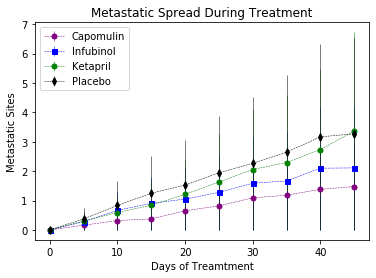

In [20]:
# Generate the Plot (with Error Bars)
metfig = plt.figure()

plt.errorbar(metastatic_response_pivot.index, metastatic_response_pivot['Capomulin'], yerr=metastatic_response_sem_pivot['Capomulin'],
             color='purple', marker='o', markersize=5, linestyle='--', linewidth=0.5, label = 'Capomulin')

plt.errorbar(metastatic_response_pivot.index, metastatic_response_pivot['Infubinol'], yerr=metastatic_response_sem_pivot['Infubinol'],
             color='b', marker='s', markersize=5, linestyle='--', linewidth=0.5, label = 'Infubinol')

plt.errorbar(metastatic_response_pivot.index, metastatic_response_pivot['Ketapril'], yerr=metastatic_response_sem_pivot['Ketapril'],
             color='g', marker='o', markersize=5, linestyle='--', linewidth=0.5, label = 'Ketapril')

plt.errorbar(metastatic_response_pivot.index, metastatic_response_pivot['Placebo'], yerr=metastatic_response_sem_pivot['Placebo'],
             color='black', marker='d', markersize=5, linestyle='--', linewidth=0.5, label = 'Placebo')

# Chart title
plt.title("Metastatic Spread During Treatment")
# x label
plt.xlabel("Days of Treamtment")
# y label
plt.ylabel("Metastatic Sites")
# legend 
plt.legend(loc='upper left')

# Save the Figure
metfig.savefig("Metastatic graph.png",bbox_inches="tight")
# Show the Figure
plt.show()

## Survival Rates

In [21]:
# Select required columns for analysis

survival_rate_df = drug_trial_data[['Drug', 'Timepoint', 'Mouse ID']]

#Index
survival_rate_df = survival_rate_df.set_index(['Drug', 'Timepoint'])
survival_rate_df.head()


Mouse ID
Drug      Timepoint         
Capomulin 0             b128
          5             b128
          10            b128
          15            b128
          20            b128

In [22]:
# Minor Data Munging to Re-Format the Data Frames
survival_rate_df['Mouse Count'] = survival_rate_df.groupby(['Drug','Timepoint']).count()['Mouse ID']

# Preview the Data Frame
survival_rate_pivot = survival_rate_df.pivot_table(index='Timepoint',columns='Drug',values='Mouse Count')  
survival_rate_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


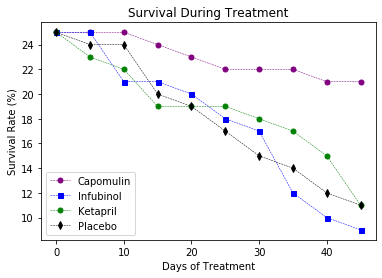

In [23]:
# Generate the Plot (Accounting for percentages)
surfig = plt.figure()

plt.errorbar(survival_rate_pivot.index, survival_rate_pivot['Capomulin'], 
             color='purple', marker='o', markersize=5, linestyle='--', linewidth=0.5, label = 'Capomulin')

plt.errorbar(survival_rate_pivot.index, survival_rate_pivot['Infubinol'], 
             color='b', marker='s', markersize=5, linestyle='--', linewidth=0.5, label = 'Infubinol')

plt.errorbar(survival_rate_pivot.index, survival_rate_pivot['Ketapril'], 
             color='g', marker='o', markersize=5, linestyle='--', linewidth=0.5, label = 'Ketapril') 

plt.errorbar(survival_rate_pivot.index, survival_rate_pivot['Placebo'], 
             color='black', marker='d', markersize=5, linestyle='--', linewidth=0.5, label = 'Placebo')

# Chart title
plt.title("Survival During Treatment")
# x label
plt.xlabel("Days of Treatment")
# y label
plt.ylabel("Survival Rate (%)")
# legend 
plt.legend(loc='lower left')
# Save the Figure
surfig.savefig("Survival Rate graph.png",bbox_inches="tight")
# Show the Figure
plt.show()

## Summary Bar Graph

In [24]:
tumor_volume_change_percentage =  ((tumor_response_pivot.iloc[-1]-tumor_response_pivot.iloc[0])/tumor_response_pivot.iloc[0]) * 100
tumor_volume_change_percentage

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [25]:
tumor_volume_change_percentage.index
drug = list(tumor_volume_change_percentage.index)
drug


['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [26]:
tumor_percent_change = list(tumor_volume_change_percentage.values)
tumor_percent_change

[-19.475302667894155,
 42.516491855897414,
 46.12347172785184,
 57.02879468660604,
 53.923347134769195,
 51.29796048315153,
 47.24117486320634,
 -22.32090046276666,
 52.085134287898995,
 46.57975086509522]

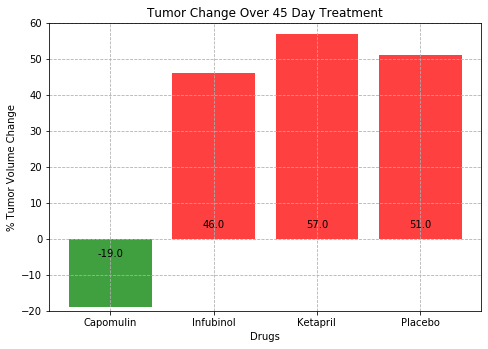

In [27]:
fig = plt.figure()
graph = fig.add_axes([0,0,1,1])

x = [1,2,3,4]
x_values = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
y_values = [round(tumor_volume_change_percentage.loc['Capomulin']), round(tumor_volume_change_percentage .loc['Infubinol']), round(tumor_volume_change_percentage .loc['Ketapril']), round(tumor_volume_change_percentage .loc['Placebo'])]
colors = ['r' if i>0 else 'g' for i in y_values]
graph.bar(x, y_values, color=colors, alpha=0.75, tick_label=x_values)

for a,b in zip(x, y_values):
    c = 0
    if b > 0:
        c = 3
    else:
        c = -5
    plt.text(a, c, str(b), ha='center')

graph.set_ylim(-20, 60)
graph.grid(linestyle='--')

plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Drugs")
plt.ylabel("% Tumor Volume Change")

fig.savefig("Summary graph.png",bbox_inches="tight")
plt.show()

In [28]:
#SUMMARY

#Tumor Response to Treatment:  This analysis shows that three of the drugs were 
#not successful to decrease the volume of the tumor. The tumor instead grew with the following drugs, 
#Influbinol, Ketapril and Placebo. Capomulin shows to have been the most successful drug to drastically 
#decrease the tumor considerably every 10 days.

#Metastatic Spread During Treatment: The cancer has spread with all four trail drugs. The cancer 
#has spread at a similar rate with Ketapril and Placebo however Ketapril spread continued to increase 
#while Placebo spread seems to normalize.

#Survival Rate and Summary:  The survival rate is very interesting, Infubional showed to be better 
#responding to the tumor volume and metastatic spread than Ketapril and Placebo but yet the survival 
#is less than 10% . The tumor best responded to Capomulin with a 19% success rate and per the graphs
#it was the most result stable drug. 
